# Perkenalan
- Nama : Muhammad Sanzabi Libianto
- Batch : 11
- Graded Challenge 4 - Phase 1
- Objective : Membuat model Clustering terhadap dataset `credit-card-information` untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dengan rentang penggunaan kartu kredit selama 6 bulan terakhir.

## Query pada Google Cloud :

Statment:

Query yang dipakai pada Google Cloud dengan mengambil semua data pada dataset.

---
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Statment:

Melakukan import library yang digunakan.

---
# Data Loading

In [2]:
df = pd.read_csv("h8dsft_P1G4_Muhammad_Sanzabi.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Statment:

Melakukan loading data yang sebelumnya telah diambil dari Google Cloud dan melihat info dari dataset.

In [3]:
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.59841,0.0,8


Statment:

Melihat 3 data teratas pada dataset.

In [4]:
df.tail(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


Statment:

Melihat 3 data terbawah pada dataset.


---
# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Correlation Heatmap')

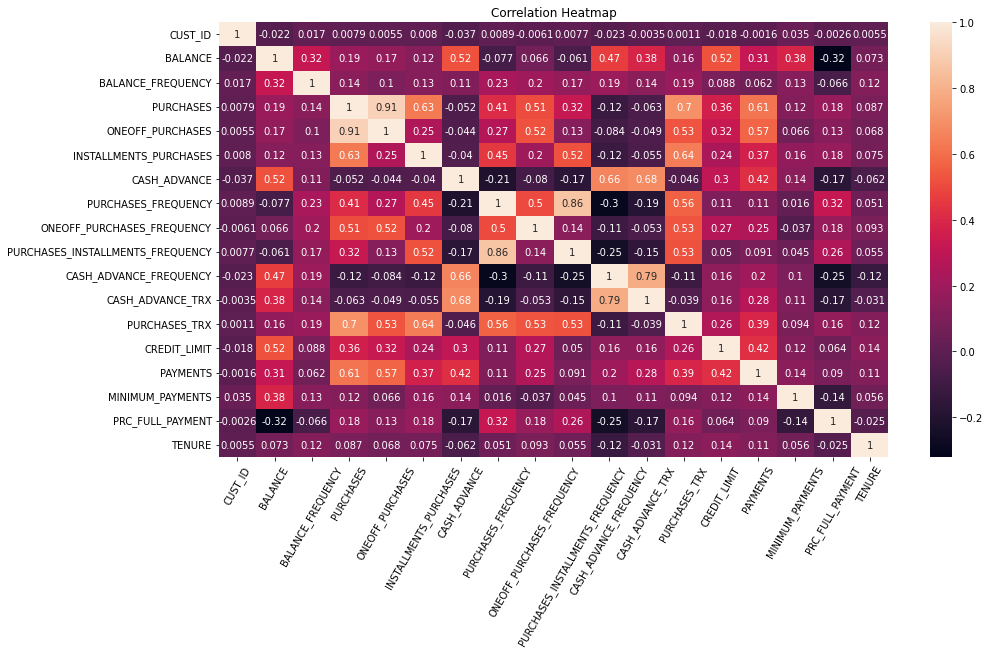

In [5]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
heatmap.set_title('Correlation Heatmap')

Statment:

Pada diagram heatmap diatas, diketahui bahwa `korelasi antar kolom pada dataset rendah` dimana rata-rata nilai korelasi terhadap kolom dan lainnya hanya dibawah 0.2. Walaupun ada beberapa kolom yang memiliki korelasi sangat tinggi, seperti kolom `PURCHASES_INSTALLMENTS_FREQUENCY` pada `CASH_ADVANCE` dan kolom lainnya.

<AxesSubplot:xlabel='PURCHASES_TRX', ylabel='CREDIT_LIMIT'>

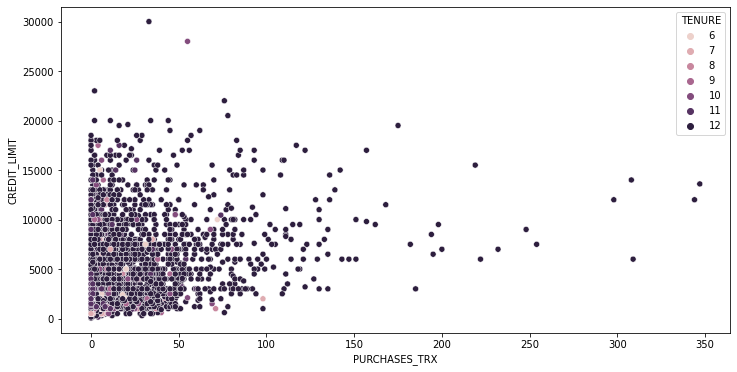

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="PURCHASES_TRX", y="CREDIT_LIMIT",hue="TENURE", data=df)

Statment:

Pada diagram diatas dapat dilihat bahwa `kebanyakan populasi memiliki batas tenor (tenur) pembayaran selama 12 bulan, Sekalipun user tersebut memiliki Credit Limit yang besar dan melakukan banyak transaksi ( >300 Purchases_Trx)`. Uniknya pada diagram ini dapat dilihat pula bahwa terdapat user dengan Credit Limit yang kecil (<$5000 USD) memiliki batas tenor yang kecil padahal user tersebut telah melakukan transaksi sebanyak 100 selama 6 Bulan ini. 

<AxesSubplot:xlabel='TENURE'>

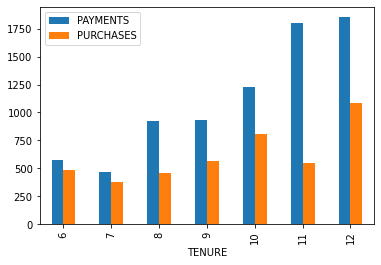

In [7]:
df[["PAYMENTS","PURCHASES"]].groupby(df["TENURE"]).mean().plot(kind='bar')

Statment:

Dapat dilihat pada diagram diatas, `saya menemukan insight yang menarik mengenai data Credit Card kali ini. Dimana rata-rata user yang memiliki jatuh tempoh di 11 dan 12 bulan memiliki angka pembayaran yang lebih tinggi (Payments) dibandingkan dengan jenis barang / jasa yang dibeli oleh user tersebut (Purchases)`. Apakah tingkat kenaikan dari pembayaran adanya korelasi dengan Tingkat Bunga Kredit, Biaya administrasi dan biaya lainnya yang mengakibatkan user tersebut membayar 2x lipat atau lebih dari harga barang / jasa yang dibelinya ? Sayangnya di dataset ini tidak tercantum penjelasan mengenai kejadian ini.

---
# Data Preprocessing

## Data Inference

In [8]:
data_inf = df.sample(15, random_state=42)
data_inf.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2519,5507,605.203304,1.0,1279.50,543.0,736.50,203.148527,1.000000,0.375,0.875,0.25,5,37,1000.0,661.341498,142.598800,0.142857,8
2655,5669,1377.184745,1.0,0.00,0.0,0.00,173.972384,0.000000,0.000,0.000,0.50,7,0,1500.0,366.247349,451.841215,0.000000,12
2110,6083,101.564003,1.0,418.59,0.0,418.59,0.000000,0.833333,0.000,0.500,0.00,0,5,1000.0,422.538988,81.389378,0.500000,6


Statment:

Mengambil sample pada dataset berjumlah 15 (Data Inference), yang nanti akan digunakan sebagai data baru untuk melihat hasil prediksi dari model yang telah dibuat.

In [9]:
X_data = df.drop(data_inf.index)
X_data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.59841,0.0,8


Statment:

Menghapus seluruh data inference pada dataset dan selanjutnya membentuk dataset untuk data X

In [10]:
X_data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.tail(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
12,4061,81.170395,0.818182,626.50,0.00,626.50,0.0,0.583333,0.00,0.500000,0.0,0,7,2500.0,445.640989,112.818984,0.454545,12
13,5323,635.090434,0.818182,5758.71,2252.37,3506.34,0.0,0.750000,0.25,0.750000,0.0,0,48,2900.0,7943.570210,197.416104,1.000000,12
14,8933,125.793836,1.000000,630.00,0.00,630.00,0.0,1.000000,0.00,0.916667,0.0,0,12,1000.0,373.891965,166.265696,0.200000,12


Statment: 

 Melakukan reset index pada kedua dataset yang telah terbentuk. Hal ini dilakukan agar pada saat data dimasukkan ke dalam model tidak akan menimbulkan error dikarenakan index yang tidak tersusun.

## Handling Missing Value

In [11]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Statment:

Dapat dilihat bahwa kolom MINIMUM_PAYMENTS memiliki cukup banyak nilai Null, sehingga akan dilakukannya proses handling missing values tersebut.

In [12]:
df[df["MINIMUM_PAYMENTS"].isnull()].T

,0,1,6,21,25,31,79,83,100,156,...,4074,4078,4129,4137,4268,4271,4272,4274,4276,4358
CUST_ID,3091.000000,5069.000,8629.000000,883.000000,1173.000000,1711.00,6573.00,6863.000000,8211.00,3115.000000,...,4409.000000,6741.000000,5463.000000,4769.000000,381.000000,2693.000000,2813.000000,3943.000000,5999.000000,3577.000000
BALANCE,3.833185,0.000,0.228572,1464.324632,16.887571,0.00,0.00,10.684577,0.00,24.297113,...,58.239998,31.490163,3.647117,677.466332,14.891634,19.949534,0.000000,8.187263,25.998899,3625.218146
BALANCE_FREQUENCY,0.125000,0.000,0.125000,1.000000,0.363636,0.00,0.00,0.181818,0.00,0.636364,...,1.000000,0.636364,0.100000,1.000000,0.222222,0.111111,0.000000,0.111111,0.111111,1.000000
PURCHASES,45.000000,176.030,60.000000,1174.390000,1083.000000,9.28,63.30,300.000000,37.65,230.470000,...,556.930000,280.350000,0.000000,283.300000,0.000000,0.000000,0.000000,0.000000,0.000000,313.270000
ONEOFF_PURCHASES,45.000000,176.030,60.000000,1174.390000,1083.000000,0.00,0.00,0.000000,0.00,0.000000,...,556.930000,280.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,313.270000
INSTALLMENTS_PURCHASES,0.000000,0.000,0.000000,0.000000,0.000000,9.28,63.30,300.000000,37.65,230.470000,...,0.000000,0.000000,0.000000,283.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,...,453.660855,900.547414,58.174402,668.675103,116.193463,326.731167,253.887233,793.848237,466.387778,668.468743
PURCHASES_FREQUENCY,0.125000,0.125,0.125000,0.250000,0.250000,0.25,0.25,0.250000,0.25,0.500000,...,0.166667,0.166667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
ONEOFF_PURCHASES_FREQUENCY,0.125000,0.125,0.125000,0.250000,0.250000,0.00,0.00,0.000000,0.00,0.000000,...,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.000,0.000000,0.000000,0.000000,0.25,0.25,0.250000,0.25,0.500000,...,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Statment:

Pada user yang memiliki nilai Null pada kolom MINIMUM_PAYMENTS, `saya tidak menemukan adanya korelasi ataupun data yang dapat dijadikan alasan mengenai mengapa kolom MINIMUM_PAYMENTS tersebut dapat bernilai Null, Selain dari user yang memiliki BALANCE bernilai 0 sehingga MINIMUM_PAYMENTS menjadi Null`. Oleh karena itu menurut Personal Judgment saya, saya akan melakukan drop terhadap data yang memiliki nilai Null tersebut. Hal ini dikarenakan saya tidak ingin mengisi nilai Null dengan imputasi mean / median dari user yang memiliki Balance 0, dimana user dengan Balance 0 cukup banyak. 

In [13]:
X_data.dropna(axis=0, how='any', inplace=True)
print('Total X_data :',X_data.shape[0])
print('Total X_data yang bernilai Null :',X_data.isnull().sum().sum())


Total X_data : 4305
Total X_data yang bernilai Null : 0


Statment:

Setelah dilakukannya drop terhadap nilai Null pada data, total datanya berubah menjadi 4305.

## Handling Outlier

In [14]:
dist_check = df.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])
        
print('Kolom Skew Distribution :', skew_dist)
print("=================================="*5)

print('Kolom Normal Distribution :',normal_dist)
print("=================================="*5)

Kolom Skew Distribution : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Kolom Normal Distribution : ['CUST_ID', 'PURCHASES_FREQUENCY']


Statment:

Melakukan pengecekan kolom mana saja yang memiliki data dengan distribusi Skew ataupun Normal.

In [15]:
def detect_skew(df, parameter, fold=1.5):

    for i in parameter:

        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()

        total_count = upper_count + bottom_count
        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Column': parameter, 'Total Outliers': total_count,
             'Percentage': percentage})
    return print(a)

for i in skew_dist:
    detect_skew(df, parameter=i)

{'Column': 'BALANCE', 'Total Outliers': 359, 'Percentage': 8.02}
{'Column': 'BALANCE_FREQUENCY', 'Total Outliers': 748, 'Percentage': 16.72}
{'Column': 'PURCHASES', 'Total Outliers': 424, 'Percentage': 9.47}
{'Column': 'ONEOFF_PURCHASES', 'Total Outliers': 523, 'Percentage': 11.69}
{'Column': 'INSTALLMENTS_PURCHASES', 'Total Outliers': 442, 'Percentage': 9.88}
{'Column': 'CASH_ADVANCE', 'Total Outliers': 504, 'Percentage': 11.26}
{'Column': 'ONEOFF_PURCHASES_FREQUENCY', 'Total Outliers': 557, 'Percentage': 12.45}
{'Column': 'PURCHASES_INSTALLMENTS_FREQUENCY', 'Total Outliers': 0, 'Percentage': 0.0}
{'Column': 'CASH_ADVANCE_FREQUENCY', 'Total Outliers': 172, 'Percentage': 3.84}
{'Column': 'CASH_ADVANCE_TRX', 'Total Outliers': 402, 'Percentage': 8.98}
{'Column': 'PURCHASES_TRX', 'Total Outliers': 400, 'Percentage': 8.94}
{'Column': 'CREDIT_LIMIT', 'Total Outliers': 120, 'Percentage': 2.68}
{'Column': 'PAYMENTS', 'Total Outliers': 414, 'Percentage': 9.25}
{'Column': 'MINIMUM_PAYMENTS', 'T

Statement:

Pada tahap ini dapat dilihat bahwa ada beberapa kolom memiliki outlier yang banyak. `Disini saya akan melakukan proses Handling Outlier selanjutnya, walaupun data yang dipakai merupakan data mengenai datacredit card information, namun kebanyakan model di clustering sangat sensitive terhadap outlier contohnya adalah K-Means`. Sehingga menurut Personal Judgment saya, handling outliers sangat diperlukan pada data ini agar output clustering yang lebih tepat.

In [16]:
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=1.5,
                          variables=skew_dist)
windsoriser.fit(X_data)
X_cap = windsoriser.transform(X_data)

print('Left Tail Caps  : ', windsoriser.left_tail_caps_)
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'BALANCE': -2785.7747375000004, 'BALANCE_FREQUENCY': 0.7727275, 'PURCHASES': -1602.4, 'ONEOFF_PURCHASES': -897.135, 'INSTALLMENTS_PURCHASES': -703.5, 'CASH_ADVANCE': -1750.4740665000002, 'ONEOFF_PURCHASES_FREQUENCY': -0.4999995, 'PURCHASES_INSTALLMENTS_FREQUENCY': -1.125, 'CASH_ADVANCE_FREQUENCY': -0.375, 'CASH_ADVANCE_TRX': -6.0, 'PURCHASES_TRX': -24.5, 'CREDIT_LIMIT': -5500.0, 'PAYMENTS': -1891.1791600000001, 'MINIMUM_PAYMENTS': -814.0301275, 'PRC_FULL_PAYMENT': -0.2500005, 'TENURE': 12.0}
Right Tail Caps :  {'BALANCE': 5030.4785385000005, 'BALANCE_FREQUENCY': 1.1363635, 'PURCHASES': 2784.16, 'ONEOFF_PURCHASES': 1495.225, 'INSTALLMENTS_PURCHASES': 1172.5, 'CASH_ADVANCE': 2917.4567775000005, 'ONEOFF_PURCHASES_FREQUENCY': 0.8333325, 'PURCHASES_INSTALLMENTS_FREQUENCY': 1.875, 'CASH_ADVANCE_FREQUENCY': 0.625, 'CASH_ADVANCE_TRX': 10.0, 'PURCHASES_TRX': 43.5, 'CREDIT_LIMIT': 13700.0, 'PAYMENTS': 4243.787056, 'MINIMUM_PAYMENTS': 1806.6647325000001, 'PRC_FULL_PAYMENT': 0.

Statment:

Setelah dilakukan Handing Outlier dengan menggunakan metode capping, maka nilai pada kolom yang terdapat data outlier sekarang telah di capping menjadi data maksimum dan minimum tiap kolomnya.

In [17]:
print('Balance - Before Capping')
print(X_data.BALANCE.describe())
print('')
print('Balance - After Capping')
print(X_cap.BALANCE.describe())

Balance - Before Capping
count     4305.000000
mean      1604.526883
std       2085.307706
min          0.000000
25%        145.320241
50%        923.977036
75%       2099.383560
max      18495.558550
Name: BALANCE, dtype: float64

Balance - After Capping
count    4305.000000
mean     1435.660942
std      1565.668368
min         0.000000
25%       145.320241
50%       923.977036
75%      2099.383560
max      5030.478539
Name: BALANCE, dtype: float64


Statment:

Hasilnya dpaat dilihat dari Handling Outlier dengan metode capping pada kolom Balance, dimana nilai max sebelum capping adalah 18495.558550 berubah menjadi 5030.478539 setelah dilakukannya capping. 


## Feature Scalling

In [18]:
# MiMax Scaler

scaler = MinMaxScaler()
scaler.fit_transform(X_cap)

array([[0.67881091, 0.15067448, 0.44999945, ..., 1.        , 0.        ,
        0.        ],
       [0.70295038, 0.05259273, 0.        , ..., 0.04727531, 0.        ,
        0.        ],
       [0.86656236, 0.08758881, 1.        , ..., 0.07628881, 0.        ,
        0.        ],
       ...,
       [0.82096558, 0.26296079, 1.        , ..., 0.17314761, 0.        ,
        0.        ],
       [0.94389808, 0.21079332, 1.        , ..., 0.15335912, 0.        ,
        0.        ],
       [0.22284309, 0.68535711, 1.        , ..., 0.45267623, 0.        ,
        0.        ]])

Statment:

Dikarenakan data yang dipakai keseluruhannya berupa kolom yang bertipe numerik maka saya langsung melakukan proses Scalling. Dimana pada proses scalling ini saya menggunakan metode Min-Max Scaler untuk data skew yang sebelumnya tidak saya Handing Outliernya.

## Checking Variance Inflation Factor

In [19]:
vif_data = pd.DataFrame()
vif_data['Features'] = X_cap.columns
vif_data['VIF'] = [variance_inflation_factor(X_cap.values, i) for i in range(len(X_cap.columns))]
vif_data

,Features,VIF
0,CUST_ID,1.005912
1,BALANCE,5.883030
2,BALANCE_FREQUENCY,1.354591
3,PURCHASES,16.582874
4,ONEOFF_PURCHASES,10.588659
5,INSTALLMENTS_PURCHASES,7.300948
6,CASH_ADVANCE,3.751141
7,PURCHASES_FREQUENCY,10.753923
8,ONEOFF_PURCHASES_FREQUENCY,6.342067
9,PURCHASES_INSTALLMENTS_FREQUENCY,12.206210


Statment:

Melakukan pengecekan tiap kolomnya menggunakan metode VIF, dimana didapatkan ada 8 kolom yang bersifat Independent (nilai VIF <5) dan sisanya adalah bersifat Dependant.

## Dimensionality Reduction

In [20]:
# Reduction with PCA

pca_scal = PCA(n_components=10).fit(X_cap)
pca_scal.explained_variance_ratio_

array([5.14481649e-01, 2.69089589e-01, 9.59195473e-02, 6.41070281e-02,
       3.29371183e-02, 1.40235667e-02, 5.79617381e-03, 3.05663284e-03,
       5.86475761e-04, 2.05499034e-06])

Statment:

Sebelum mengetahui berapa jumlah kolom terbaik setelah direduksi makan dilakukan inisiasi awal pada metode PCA dengan jumlah komponen berjumlah 10.

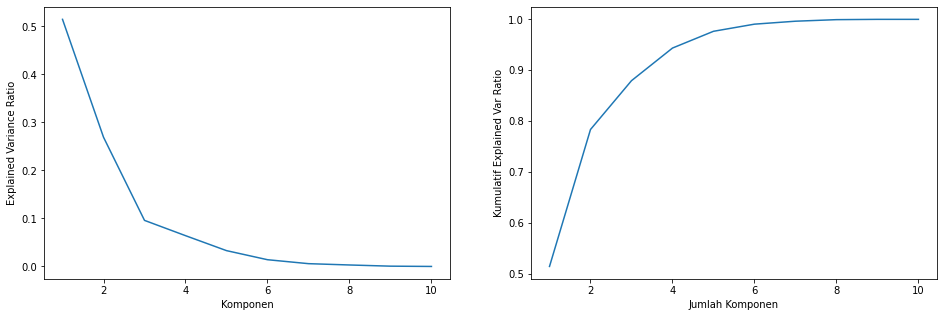

In [21]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,11),pca_scal.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,11),np.cumsum(pca_scal.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Statment:

Visualisasi mengenai metode PCA yang telah dilakukan, dimana dapat dilihat pada diagram sebelah kanan terdapat patahan pada komponen 6 memiliki ratio sekitar 0.95. Sehingga dari total 17 kolom yang dimiliki oleh dataset, maka akan direduksi menjadi 5 kolom saja.

In [22]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_cap)

print('Dimensional X_reduced :',X_reduced.shape)
print('Jumlah Komponen       :',pca.n_components_,'Komponen')

Dimensional X_reduced : (4305, 5)
Jumlah Komponen       : 5 Komponen


Statment:

Hasil dari reduksi dimensi yang telah dilakukan, dimana telah ditentukan bahwa jumlah component yang akan diambil adalah berjumlah 0.95 yang artinya jumlah komponen / kolom yang akan dipakai adalah 5.

---
# Model Definition

Pada tahap ini akan dilakukan inisiasi / definisi awal dari model-model yang akan digunakan.

## K-Means Clustering

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)

KMeans(n_clusters=3)

Statment:

Inisiasi awal pada model yang akan dipakai, yaitu K-Means. Dimana inisiasi cluster awal berjumlah 3. Inisiasi nilai ini bukanlah jumlah cluster yang akan terbentuk, melainkan hanya inisiasi nilai saja. Untuk nilai K / cluster yang terbentuk akan dioptimalkan dengan menggunakan metode elbow.

### Elbow Method

Text(0, 0.5, 'Inertia')

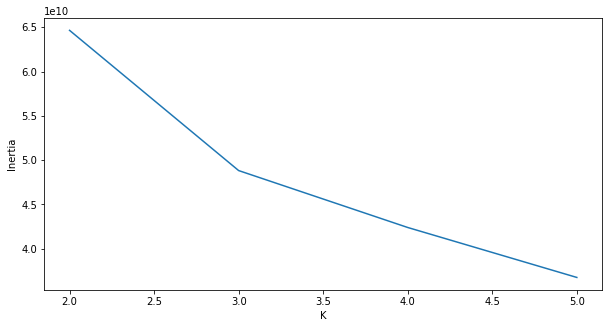

In [24]:
K=[2,3,4,5]
inertia=[KMeans(n_clusters=i).fit(X_reduced).inertia_ for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Statment:

Nilai hasil dari elbow method dimana terdapat patahan pada angka K 3, yang artinya cluster yang dapat dibentuk / terbaik adalah 3 clustering.

### Silhouette Method

In [25]:
# Ploting Silhoutte

def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):

            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


            y_lower = y_upper + 10 

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_

        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

Statment:

Menginisiasi Silhouette Method yang akan digunakan.

For n_clusters = 2 The average silhouette_score is : 0.37872706486414975
For n_clusters = 3 The average silhouette_score is : 0.3021992057205269
For n_clusters = 4 The average silhouette_score is : 0.2858010421530698
For n_clusters = 5 The average silhouette_score is : 0.28713396972146105


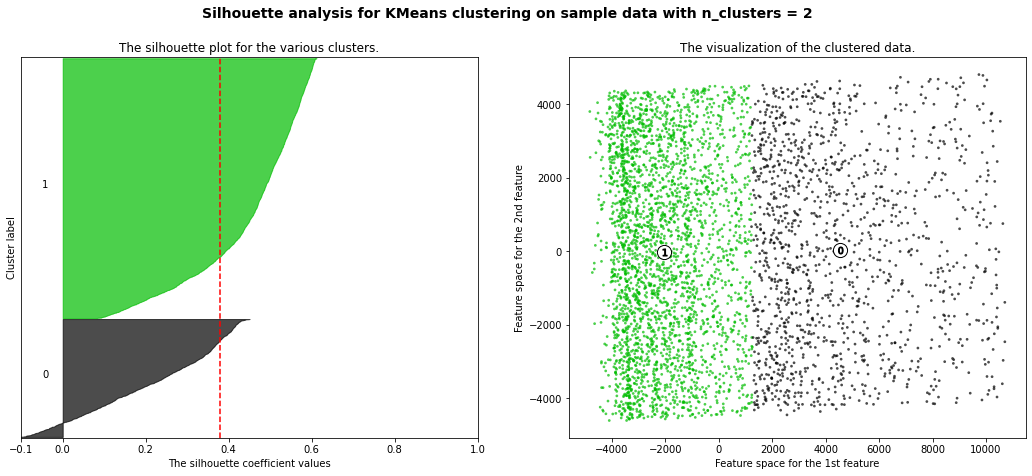

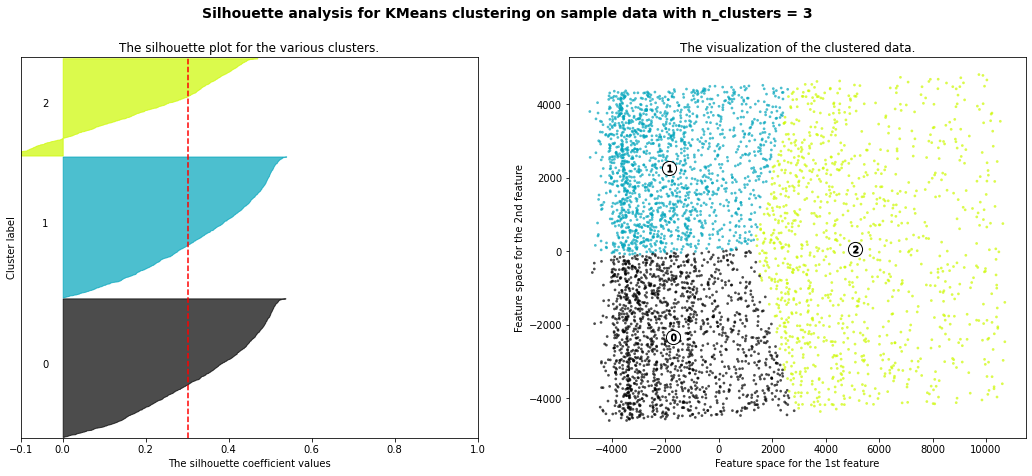

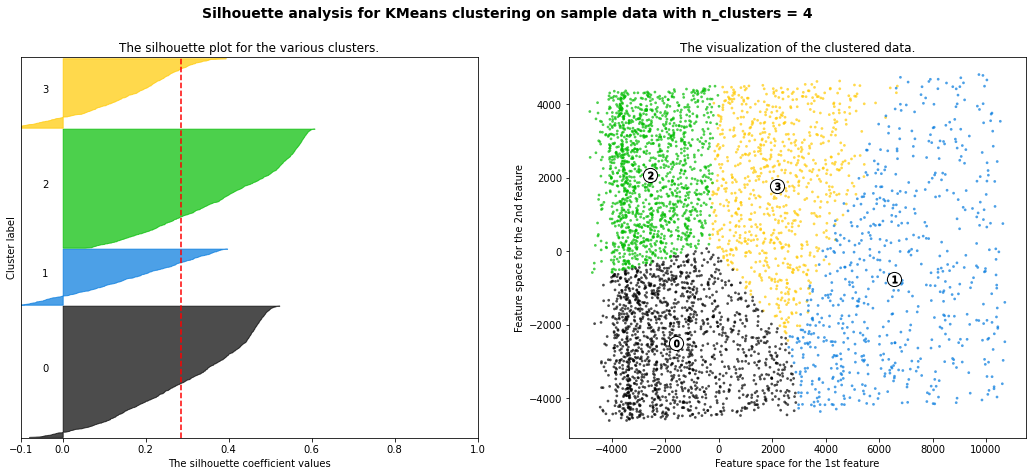

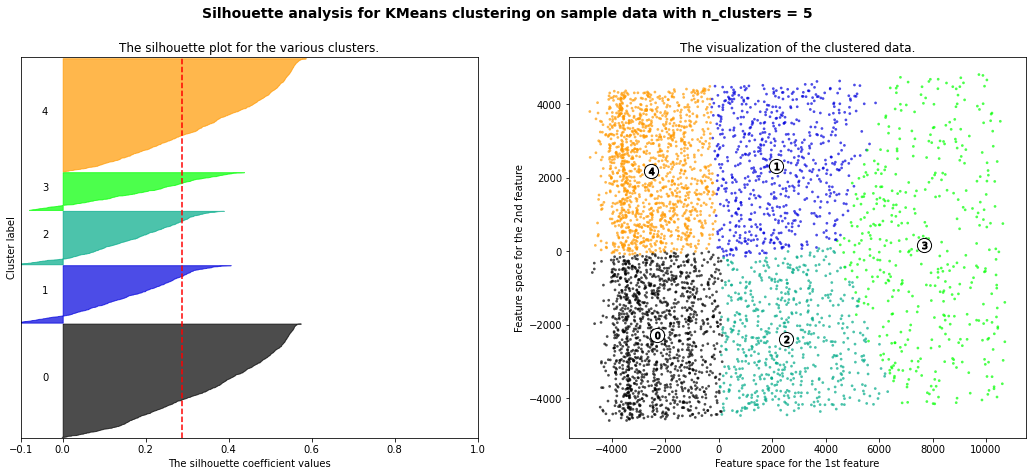

In [26]:
plot_silhouette(K, X_reduced)

Statment:

Dapat dilihat bahwa pada dengan menggunakan metode Silhouette Method ini model K-Means terlihat dapat mencluster data dengan baik. Dimana seluruh percobaan jumlah cluster dapat dengan baik di terapkan dengan menggunakan Silhouette Method ini. `Namun apabila dilihat dari Coefficient valuesnya yang dimana persebaran antar cluster dapat tersebar dengan baik, maka cluster 3 lah yang memiliki nilai Coefficient values terbaik`. Sehingga disini K-Means akan membentuk 3 cluster sebagai hasil akhirnya.

<AxesSubplot:>

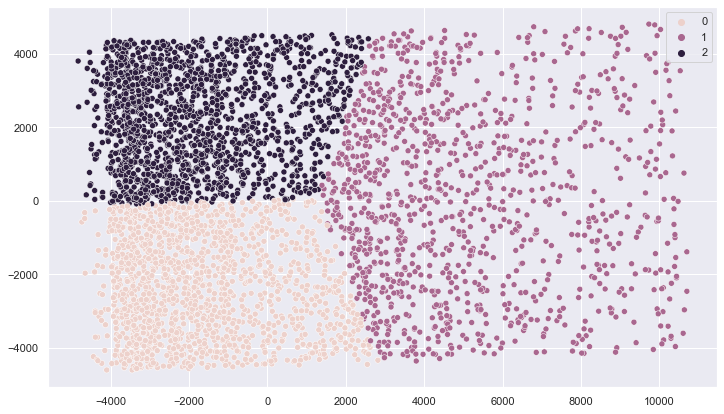

In [27]:
sns.set(rc={'figure.figsize':(12,7)})
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=kmeans.labels_)

Statment:

Hasil dari Clustering dengan menggunakan model K-Means, dimana menurut Elbow Method cluster terbaik adalah berjumlah 3. Dimana dapat dilihat pada visualisasi tersebut, model K-means dapat dengan baik melakukan clustering terhadap bentuk dataset kali ini. Sehingga terciptalah 3 cluster tersebut dengan baik. 

In [28]:
df_kmeans = pd.DataFrame(kmeans.labels_, columns=['Cluster'])

Statment:

Merubah hasil dari cluster yang telah terbentuk ke dalam bentuk dataframe.

In [29]:
data_kmeans = pd.concat([X_data, df_kmeans], axis=1)
data_kmeans.Cluster.value_counts()

2.0    1610
0.0    1583
1.0    1112
Name: Cluster, dtype: int64

Statment:

Melakukan merge terhadap data yang telah di cluster sebelumnya dengan dataset dan melihat total cluster yang terbentuk pada dataset.

<AxesSubplot:xlabel='CUST_ID'>

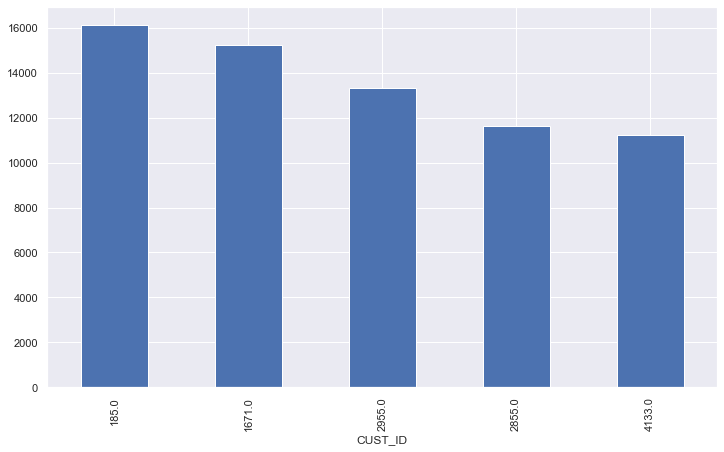

In [30]:
cluster0 = data_kmeans[data_kmeans["Cluster"] == 0]
cluster0.sort_values(by="BALANCE", ascending=False).head(5).plot(kind='bar',x='CUST_ID',y='BALANCE',legend=False)

Statment:

Mengambil nilai spesifik pada data cluster yang telah dimerger sebelumnya yaitu dengan nilai cluster 0. Disini dapat kita lihat bahwa pada kumpulan data di cluster 0 merupakan kumpulan user dengan data tertinggi atau dalam kasus ini saya mengambil kolom Balance sebagai contohnya. `Dimana kumpulan data ini lah yang hampir seluruh datanya bersifat outlier sehingga data pada cluster ini adalah hasil Outlier Handling`. Hal tersebut harus dilakukan dikarenakan model clustering K-Means merupakan model yang sangat sensitive terhadap outlier.

## Spectral Clustering

In [31]:
scl = SpectralClustering(n_clusters=3,affinity='nearest_neighbors')
scl.fit(X_reduced)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

Statment:

Melakukan inisiasi awal model yang menggunakan Spectral Clustering sebagai model ke 2, dengan parameter yang telah diinisasi terlebih dahulu yaitu :

- n_clusters : 3

Disini saya menggunakan cluster sebanyak 3 dikarenakan hasil dari K-Means yang menunjukkan bahwa data dapat dengan baik terbagi menjadi 3 cluster.
- affinity : nearest_neighbors

Disini saya menggunakan parameter affnity sebagai nearest_neighbors atau dengan kata lain saya ingin membuat matriks yang berdasarkan metode nearest_neighbors yaitu mencari data dengan nilai terdekat terhadap tetangganya. 

<AxesSubplot:>

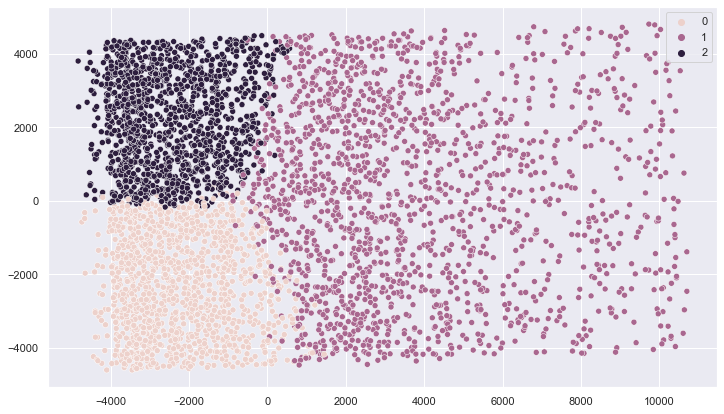

In [32]:
sns.set(rc={'figure.figsize':(12,7)})
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=scl.labels_)

Statment:

Dapat dilihat hasil plotting dari clustering yang menggunakan model Spectral Clustering. Dimana terdapat beberapa data yang menyimpang dari cluster seharusnya, contoh pada cluster 1 berwarna ungu terdapat beberapa data yang menyimpang ke cluster 2 berwarna hitam. `Hal ini merupakan sifat  dari model Spectral Clustering, dimana model tersebut selama nilai datanya mendekati dengan node nilai data sebelumnya maka data tersebut akan masuk ke cluster data sebelumya walaupun data tersebut secara plotting masuk ke cluster yang berbeda`.

In [33]:
df_scl = pd.DataFrame(scl.labels_, columns=['Cluster'])

Statment:

Merubah hasil dari cluster yang telah terbentuk ke dalam bentuk dataframe.

In [34]:
hasil_scl = pd.concat([X_data, df_scl], axis=1)
hasil_scl["Cluster"].value_counts()

1.0    1653
0.0    1339
2.0    1313
Name: Cluster, dtype: int64

Statment:

Melakukan merge terhadap data yang telah di cluster sebelumnya dengan dataset dan melihat total cluster yang terbentuk pada dataset.

<AxesSubplot:xlabel='CUST_ID'>

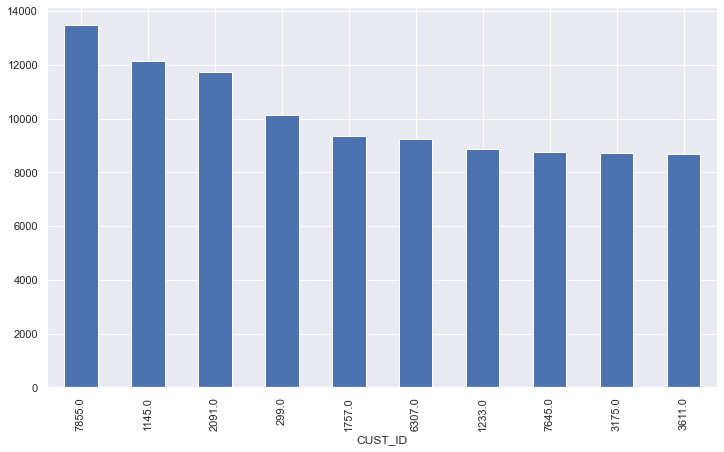

In [35]:
cluster2 = hasil_scl[hasil_scl["Cluster"] == 2]
cluster2.sort_values(by="BALANCE",ascending=False).head(10).plot(kind='bar',x='CUST_ID',y='BALANCE',legend=False)

Statment:

Disini dapat kita lihat bahwa pada kumpulan data di cluster 2 merupakan kumpulan user dengan data menengah, dalam kasus ini saya mengambil kolom Balance sebagai contohnya. `Dimana dapat dilihat bahwa data pada cluster 2 ini memiliki data yang sepertinya harus masuk di cluster 1 atau masuk kedalam clustering dengan data tertinggi dalam kasus ini mengambil kolomd dari Balance`. Hal tersebut yang membuat algoritma Spectral Clustering menjadi kurang baik dalam hal akurasi dikarenakan sifat dari algoritma tersebut yang kurang cocok dengan dataset kali ini.

## Agglomerative Clustering

In [36]:
agg = AgglomerativeClustering(n_clusters= 3, linkage="ward").fit(X_reduced)

Statment:

Melakukan inisiasi awal model yang menggunakan Agglomerative Clustering sebagai model ke 3, dengan parameter yang telah diinisasi terlebih dahulu yaitu :

- n_clusters : 3

Disini saya menggunakan cluster sebanyak 3 dikarenakan hasil dari K-Means dan Spectral Clustering yang menunjukkan bahwa data dapat dengan baik terbagi menjadi 3 cluster.
- linkage : ward

Disini saya menggunakan parameter linkage sebagai ward, dimana linkage merupakan sebuah kriteria dari menentukan jarak yang akan digunakan dalam pengamatan terhadap dataset yang dipakai. Penggunaan Ward merupakan salah satu cara dari meminimalkan variance data dari cluster yang akan dibentuk.

<AxesSubplot:>

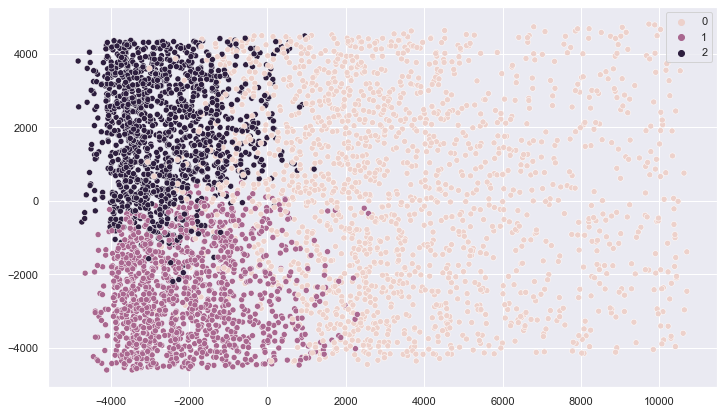

In [37]:
sns.set(rc={'figure.figsize':(12,7)})
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=agg.labels_)

Statment:

Dapat dilihat hasil plotting dari clustering yang menggunakan model Agglomerative Clustering. Dimana terdapat beberapa data yang menyimpang dari cluster seharusnya, seperti halnya model dari Spectral dimana model Agglomerative kurang mampu membuat clustering terhadap dataset ini. `Hal ini merupakan sifat dari model Agglomerative Clustering dimana cara kerja dari model ini membuat cluster berdasarkan hierarki datanya atau berdasarkan Tree model`. Model ini membuat clustering dengan cara data memiliki clusteringnya masing-masing yang pada akhirnya data tersebut akan digabungkan berdasarkan cluster sama / berdekatan.

In [38]:
df_agg = pd.DataFrame(agg.labels_, columns=['Cluster'])

Statment:

Merubah hasil dari cluster yang telah terbentuk ke dalam bentuk dataframe.

In [39]:
hasil_agg = pd.concat([X_data, df_agg], axis=1)
hasil_agg["Cluster"].value_counts()

0.0    1751
2.0    1319
1.0    1235
Name: Cluster, dtype: int64

Statment:

Melakukan merge terhadap data yang telah di cluster sebelumnya dengan dataset dan melihat total cluster yang terbentuk pada dataset.

<AxesSubplot:xlabel='CUST_ID'>

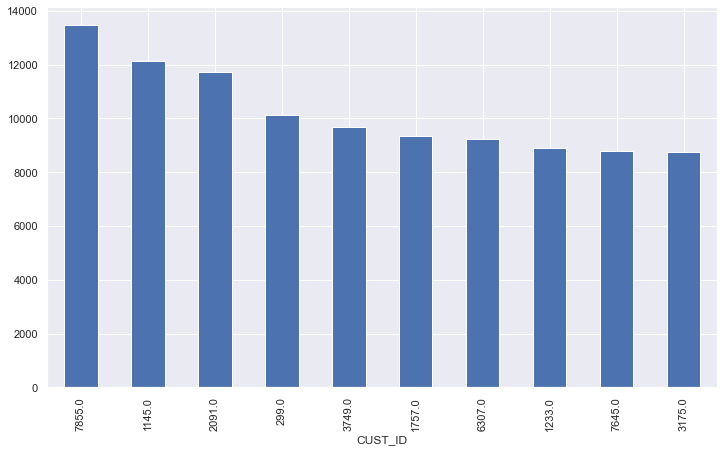

In [40]:
cluster2agg = hasil_agg[hasil_agg["Cluster"] == 2]
cluster2agg.sort_values(by="BALANCE",ascending=False).head(10).plot(kind='bar',x='CUST_ID',y='BALANCE',legend=False)

Statment:

Disini dapat kita lihat bahwa pada kumpulan data di cluster 2 merupakan kumpulan user dengan data kebawah, dalam kasus ini saya mengambil kolom Balance sebagai contohnya. `Dimana dapat dilihat bahwa data pada cluster 2 ini memiliki data yang sepertinya harus masuk di cluster 0 maupun cluster 1 atau masuk kedalam clustering dengan data tertinggi dalam kasus ini mengambil kolomd dari Balance`. Hal tersebut yang membuat algoritma Agglomerative Clustering menjadi kurang baik dalam hal akurasi dikarenakan cara kerja dari algoritma ini berdasarkan dari hierarki datanya. Sehingga membuat model Agglomerative kurang baik apabila dilihat dari plotting hasil clustering datanya.

# Hyperparameter Tuning

In [41]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=3, random_state=42))
])
pipeline.fit(X_reduced)

Pipeline(steps=[('kmeans', KMeans(n_clusters=3, random_state=42))])

Statment:

Melakukan inisiasi Pipeline dimana menggunakan model K-Means sebagai algoritma yang akan dilakukan Hyperparameter Tuning.

In [42]:
param_grid = dict(kmeans__n_clusters=range(2, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_reduced)

print("\nBest parameters found on dataset:",grid_clf.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s

Best parameters found on dataset: {'kmeans__n_clusters': 4}


Statment:

Melakukan percobaan dengan menggunakan metode Hyperparameter Tuning pada model Kmeans, hasilnya dapat dilihat bahwa model K-means mendapatkan best parameter terhadap cluster yaitu sebesar 4. `Dimana hasil ini cukup unik dikarenakan hasilnya sangat berbanding terbalik dengan metode Elbow maupun Silhouette yang menjadikan 3 merupakan data clustering terbaik`. 



In [43]:
param_grid = dict(kmeans__n_clusters=range(2, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_reduced)

print("\nBest parameters found on dataset:",grid_clf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n

Statment:

Sehingga berikutnya saya mencoba untuk mengubah parameter dari param_grid dimana n_cluster dari K-means dicari nilai terbaik yang dapat ditemukan dengan range dari 2 hingga 5 diubah menjadi 2 hingga 10. Hasilnya 9 Cluster lah yang merupakan nilai parameter terbaik oleh metode Grid Search. `Hasil ini cukup reaslistis dimana Grid Search mencari scoring terbaik pada sebuah model (Bisa dalam bentuk Akurasi maupun f1_score) yang dimana Grid Search tidak dapat digunakan dalam mencari Hyperparameter terbaik pada kasus ini (Clustering)`. Sehingga untuk selanjutnya saya akan tetap menggunakan cluster terbaik menurut Elbow method ataupun Silhouette yaitu 3.

# Model Inference

In [44]:
data_inf.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5507,605.203304,1.0,1279.50,543.0,736.50,203.148527,1.000000,0.375,0.875,0.25,5,37,1000.0,661.341498,142.598800,0.142857,8
1,5669,1377.184745,1.0,0.00,0.0,0.00,173.972384,0.000000,0.000,0.000,0.50,7,0,1500.0,366.247349,451.841215,0.000000,12
2,6083,101.564003,1.0,418.59,0.0,418.59,0.000000,0.833333,0.000,0.500,0.00,0,5,1000.0,422.538988,81.389378,0.500000,6


Statment:

Melihat data inference yang sebelumnya telah dibuat.

In [45]:
data_inf_scaled = scaler.transform(data_inf)

Statment:

Menscalling data inference dengan menggunakan Min-Max Scalling yang sebelumnya telah di inisiasi.

In [46]:
X_reduced_inf = pca.fit_transform(data_inf_scaled)

Statment:
    
Hasil dari data scalling tersebut, selanjut masuk ke metode PCA atau melakukan dimentions reduction.

## Prediksi dengan K-Means Clustering

In [47]:
inf_pred_kmeans = kmeans.fit_predict(X_reduced_inf)
inf_pred_kmeans

array([2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Statment:

Melakukan predict pada data Inference dengan menggunakan metode K-Means.

In [48]:
inf_df_kmeans = pd.DataFrame(inf_pred_kmeans, columns=['Cluster'])
data_prediction = pd.concat([data_inf, inf_df_kmeans], axis=1)
data_prediction.Cluster.value_counts()

0    12
2     2
1     1
Name: Cluster, dtype: int64

Statment:

Dapat dilihat hasil dari prediksi clustering terhadap data baru / data Inference, dimana kebanyakan data masuk ke cluster 1 yaitu berjumlah 12 data dan sisanya ada pada cluster 0  dengan 2 data dan 2 dengan hanya 1 data.

## Prediksi dengan Spectral Clustering

In [49]:
inf_pred_spectral = scl.fit_predict(X_reduced_inf)
inf_pred_spectral

array([1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

Statment:

Melakukan predict pada data Inference dengan menggunakan metode Spectral Clustering.

In [50]:
inf_df_spectral = pd.DataFrame(inf_pred_spectral, columns=['Cluster'])
data_prediction = pd.concat([data_inf, inf_df_spectral], axis=1)
data_prediction.Cluster.value_counts()

0    10
2     3
1     2
Name: Cluster, dtype: int64

Statment:

Dapat dilihat hasil dari prediksi clustering terhadap data baru / data Inference, dimana kebanyakan data masuk ke cluster 1 yaitu berjumlah 10 data dan sisanya ada pada cluster 0 dengan 2 data dan 2 dengan 3 data.

## Prediksi dengan Agglomerative Clustering

In [51]:
inf_pred_agg = agg.fit_predict(X_reduced_inf)
inf_pred_agg

array([1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Statment:

Melakukan predict pada data Inference dengan menggunakan metode Agglomerative Clustering.

In [52]:
inf_df_agg = pd.DataFrame(inf_pred_agg, columns=['Cluster'])
data_prediction = pd.concat([data_inf, inf_df_agg], axis=1)
data_prediction.Cluster.value_counts()

0    12
1     2
2     1
Name: Cluster, dtype: int64

Statment:

Dapat dilihat hasil dari prediksi clustering terhadap data baru / data Inference, dimana kebanyakan data masuk ke cluster 0 yaitu berjumlah 12 data dan sisanya ada pada cluster 1 dengan 2 data dan 2 dengan 1 data.

# Pengambilan Kesimpulan



Statment:

Pada objective kali ini adalah melakukan teknik Clustering terhadap data credit Card Information. Ada 3 model clustering yang digunakan pada Graded challenge 4 - Phase 1 kali ini, antara lain:

- K - Means
- Spectral Clustering
- Agglomerative Clustering

Berdasarkan EDA yang telah dilakukan sebelumnya, didapati bahwa kebanyakan kolom yang memiliki nilai korelasi terhadap kolom target tergolong **Rendah**, sedangkan ada beberapa kolom yang memeiliki korelasi cukup tinggi seperti kolom `PURCHASES_INSTALLMENTS_FREQUENCY` pada `CASH_ADVANCE` dan kolom lainnya. Selanjutnya pada dataset kali ini ditemukan cukup banyak nilai Null yang terdapat pada salah satu kolom yaitu **MINIMUM_PAYMENTS**, `dimana saya tidak menemukan adanya korelasi ataupun data yang dapat dijadikan alasan mengenai mengapa kolom MINIMUM_PAYMENTS tersebut dapat bernilai Null, Selain dari user yang memiliki BALANCE bernilai 0 sehingga MINIMUM_PAYMENTS menjadi Null`. Oleh karena itu menurut Personal Judgment saya, saya melakukan drop terhadap data yang memiliki nilai Null tersebut. Hal ini dikarenakan saya tidak ingin mengisi nilai Null dengan imputasi mean / median dari user yang memiliki Balance 0, dimana user dengan Balance 0 cukup banyak. 

Selanjutnya masuk ke dalam proses metode VIF (Variance Inflation Factor), dimana proses ini melakukan pengecekan terhadap kolom-kolom mana saja yang bersifat Independent maupun Dependat sebelum masuk ke proses Reduksi Dimensional. Hasilnya pada dataset kali ini didapatkan ada 8 kolom yang bersifat Independent (nilai VIF <5) dan sisanya adalah bersifat Dependant. Kemudian pada proses PCA atau dilakukannya proses Reduksi Dimensional, pada diagram yang terbentuk komponen 6 memiliki ratio sekitar 0.95. Sehingga dari total 17 kolom yang dimiliki oleh dataset, maka akan direduksi menjadi 5 kolom saja.

Kemudian pada proses Model Definition, pada model pertama yaitu K-means pada tahap ini menggunakan 2 teknik yang berbeda dalam menentukan nilai K-nya atau nilai dari clusteringnya. Pada teknik pertama yaitu Elbow Method pada diagram yang terbentuk terdapat patahan pada angka K 3, yang artinya cluster yang dapat dibentuk / terbaik adalah 3 clustering. Sedangkan untuk metode yang kedua yaitu Silhouette Method apabila dilihat dari Coefficient valuesnya yang dimana persebaran antar cluster dapat tersebar dengan baik, maka cluster 3 lah yang memiliki nilai Coefficient values terbaik`. Sehingga disini K-Means akan membentuk 3 cluster sebagai hasil akhirnya. Hasilnya dapat dilihat pada visualisasi pada line code : 27 , model K-means dapat dengan baik melakukan clustering terhadap bentuk dataset kali ini. Sehingga terciptalah 3 cluster tersebut dengan baik. 

Selanjutnya pada model yang kedua, yaitu Spectral Clusterring terlebih dahulu dilakukan inisiasi awal model yaitu dengan menggunakan n_clusters : 3. Hal ini dipilih karenakan hasil dari K-Means yang menunjukkan bahwa data dapat dengan baik terbagi menjadi 3 cluster. Parameter selanjutnya yaitu, affinity : nearest_neighbors dimana alasan dari menggunakan parameter affnity sebagai nearest_neighbors adalah karena saya ingin membuat matriks yang berdasarkan metode nearest_neighbors yaitu mencari data dengan nilai terdekat terhadap tetangganya. Hasilnya pada visualisasi line code: 32  terdapat beberapa data yang menyimpang dari cluster seharusnya, contoh pada cluster 1 berwarna ungu terdapat beberapa data yang menyimpang ke cluster 2 berwarna hitam. `Hal ini merupakan sifat  dari model Spectral Clustering, dimana model tersebut selama nilai datanya mendekati dengan node nilai data sebelumnya maka data tersebut akan masuk ke cluster data sebelumya walaupun data tersebut secara plotting masuk ke cluster yang berbeda`.

Untuk model ketiga yaitu Agglomerative Clustering terlebih dahulu dilakukan inisiasi awal model yaitu dengan menggunakan n_clusters : 3, Disini saya menggunakan cluster sebanyak 3 dikarenakan hasil dari K-Means dan Spectral Clustering yang menunjukkan bahwa data dapat dengan baik terbagi menjadi 3 cluster. Linkage : ward, Disini saya menggunakan parameter linkage sebagai ward, dimana linkage merupakan sebuah kriteria dari menentukan jarak yang akan digunakan dalam pengamatan terhadap dataset yang dipakai. Penggunaan Ward merupakan salah satu cara dari meminimalkan variance data dari cluster yang akan dibentuk. Hasilnya dapat dilihat pada visualisasi line code: 37 terdapat beberapa data yang menyimpang dari cluster seharusnya, seperti halnya model dari Spectral dimana model Agglomerative kurang mampu membuat clustering terhadap dataset ini. `Hal ini merupakan sifat dari model Agglomerative Clustering dimana cara kerja dari model ini membuat cluster berdasarkan hierarki datanya atau berdasarkan Tree model`. Model ini membuat clustering dengan cara data memiliki clusteringnya masing-masing yang pada akhirnya data tersebut akan digabungkan berdasarkan cluster sama / berdekatan.

Pada proses Hyperparameter Tuning, saya menggunakan Randomized Search CV sebagai teknik dalam mencari Hyperparameter terbaik bagi model K-Means saja.`Namun hasil yang didapatkan cukup unik dikarenakan hasilnya sangat berbanding terbalik dengan metode Elbow maupun Silhouette yang menjadikan 3 merupakan data clustering terbaik`. Sehingga berikutnya saya mencoba untuk mengubah parameter dari param_grid dimana n_cluster dari K-means dicari nilai terbaik yang dapat ditemukan dengan range dari 2 hingga 5 diubah menjadi 2 hingga 10. Hasilnya 9 Cluster lah yang merupakan nilai parameter terbaik oleh metode Grid Search. `Hasil ini cukup reaslistis dimana Grid Search mencari scoring terbaik pada sebuah model (Bisa dalam bentuk Akurasi maupun f1_score) yang dimana Grid Search tidak dapat digunakan dalam mencari Hyperparameter terbaik pada kasus ini (Clustering)`. Sehingga untuk selanjutnya saya akan tetap menggunakan cluster terbaik menurut Elbow method ataupun Silhouette yaitu 3.

Selanjutnya untuk hasil prediksi dengan menggunakan data Inference sebagai data baru yang akan dilakukan proses prediksi pada ketiga model, didapati bahwa kedua model sama baiknya dalam melakukan prediksi.
 

**Improvment Note**

Untuk catatan improvment kedepan yaitu:
- Pada objetive kali ini saya menggunakan Min-Max Scalling pada dataset ini, kedepannya diharapkan data mengubah atau mencoba metode scalling lainnya. Dikarenakan dari beberapa review ataupun paper yang menjelaskan tentang scalling pada hasil dari proses Clustering sangatlah berbeda apabila menerapkan berbeda teknin scalling.




# Conceptual Problems
Jawab pertanyaan berikut:


1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !


Jawaban

1. Inhertia merupakan jarak data ke pusat clusternya yang merupakan salah satu penentuan dari sebuah data ke pembagian clusternya.

2. Alasan penggunaan dari elbow method ialah untuk mencari nilai K terbaik pada dataset yang telah direduce dimensionalnya. Kelemah dari elbow method sendiri hanya mempertimbangkan optimal K dari reduce dimensinya sehingga penggunaan dari elbow sendiri harus mencari nilai K terbaiknya. 

3. Perbedaan antara K-means, Spectral dan Agglomerative, Letak perbedaanya ada pada cara model tersebut dalam melakukan proses clustering. Kmeans melakukan clustering dengan mempertimbangkan jarak antara data dengan pusat cluster. Spectral melakukan clustering dengan cara menghitung node nilai data ke node nilai datanya untuk menentukan clusternya. Sedangkan Agglomerative menentukan clustering dengan cara hierarki atau biasa disebut dengan Tree model, dimana tiap data diberikan cluster awal dan kemudian akhirnya akan terbentuk cluster besar yang mewakili semua data pada datset.